## Trees Ensemble

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

RANDOM_STATE = 55

#### Load data

In [2]:
df = pd.read_csv("heart.csv")
df.head()
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


### One-hot encoding using Pandas

First we will remove the binary variables, because one-hot encoding them would do nothing to them. To achieve this we will just count how many different values there are in each categorical variable and consider only the variables with 3 or more values.

In [4]:
# One-hot encoding of categorical variables
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

df = pd.get_dummies(df, prefix=cat_variables, columns=cat_variables)


In [5]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [8]:
# Removing our target variable so that only features(input) remain
features = [x for x in df.columns if x not in 'HeartDisease']

  ####       Splitting the dataset into training and cross validation sets

In [16]:
X_train = df[features]
y_train = df['HeartDisease']

print(f"Shape of X_train = {X_train.shape}")
print(f"shape of y_train={y_train.shape}")

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=RANDOM_STATE)

print(f"Shape of training set = {X_train.shape}")
print(f"Shape of cross validation set = {X_val.shape}")


Shape of X_train = (918, 20)
shape of y_train=(918,)
Shape of training set = (734, 20)
Shape of cross validation set = (184, 20)


### Building the Models
#### Decision Tree
In this section, let's work with the Decision Tree we previously learned, but now using the Scikit-learn implementation.

There are several hyperparameters in the Decision Tree object from Scikit-learn. We will use only some of them and also we will not perform feature selection nor hyperparameter tuning in this lab (but you are encouraged to do so and compare the results 😄 )

The hyperparameters we will use and investigate here are:

min_samples_split: The minimum number of samples required to split an internal node.
Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
max_depth: The maximum depth of the tree.
Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [ ]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]

### Hyperparameter tuning

#### Measuring model's accuracy based on the parameter - 'min_samples_split'

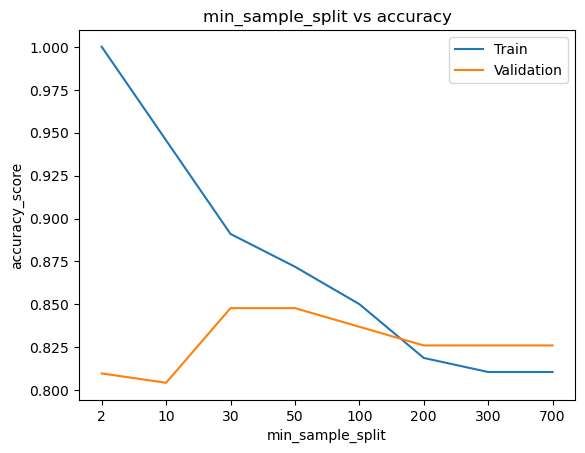

In [21]:
# Try different min_samples_split to see which one does better 
accuracy_score_train_list = []
accuracy_scrore_val_list = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_score_train = accuracy_score(y_train, y_pred_train)
    accuracy_scrore_val = accuracy_score(y_val, y_pred_val)
    accuracy_score_train_list.append(accuracy_score_train)
    accuracy_scrore_val_list.append(accuracy_scrore_val)

plt.title('min_sample_split vs accuracy')
plt.xlabel('min_sample_split')
plt.ylabel('accuracy_score')
plt.xticks(ticks = range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_score_train_list)
plt.plot(accuracy_scrore_val_list)
plt.legend(['Train', 'Validation'])



#### Measuring model's accuracy based on the parameter - 'max_depth'

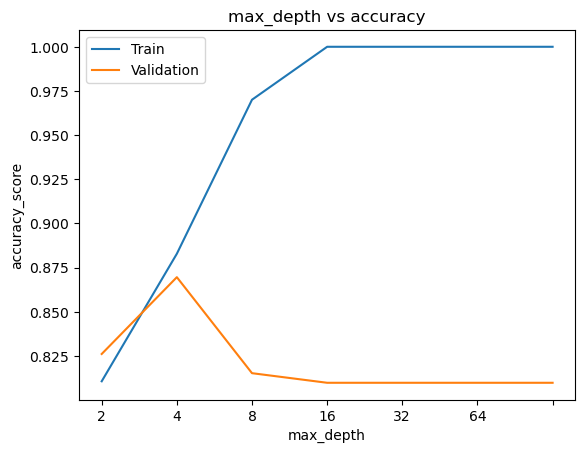

In [24]:
accuracy_score_train_list = []
accuracy_scrore_val_list = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_score_train = accuracy_score(y_train, y_pred_train)
    accuracy_scrore_val = accuracy_score(y_val, y_pred_val)
    accuracy_score_train_list.append(accuracy_score_train)
    accuracy_scrore_val_list.append(accuracy_scrore_val)

plt.title('max_depth vs accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.xticks(ticks = range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_score_train_list)
plt.plot(accuracy_scrore_val_list)
plt.legend(['Train', 'Validation'])

So we can choose the best values for these two hyper-parameters for our model to be:

- max_depth = 4
- min_samples_split = 50

In [25]:
# Lets see how the model with these hyper parameters perform 
decision_tree_model = DecisionTreeClassifier(min_samples_split=50, max_depth=4, random_state=RANDOM_STATE)
decision_tree_model.fit(X_train, y_train)
y_pred_train = decision_tree_model.predict(X_train)
y_pred_val = decision_tree_model.predict(X_val)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
accuracy_score_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy of model on Training dataset = {accuracy_score_train}")
print(f"Accuracy of model on Validation dataset = {accuracy_score_val}")

Accuracy of model on Training dataset = 0.8664850136239782
Accuracy of model on Validation dataset = 0.8695652173913043


## Random Forest

Now let's try the Random Forest algorithm also, using the Scikit-learn implementation.

All of the hyperparameters found in the decision tree model will also exist in this algorithm, since a random forest is an ensemble of many Decision Trees.
And some extra parameters are 

- n_estimators : No. of decision trees that make up the random forest. Default = 100
- max_features : Randomly selected features to train each individual. Default =  sqrt(n), where n are the total no. of features. 
- n_jobs: No. of parallel jobs to a train decision tree


In [34]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10, 50, 100, 500]

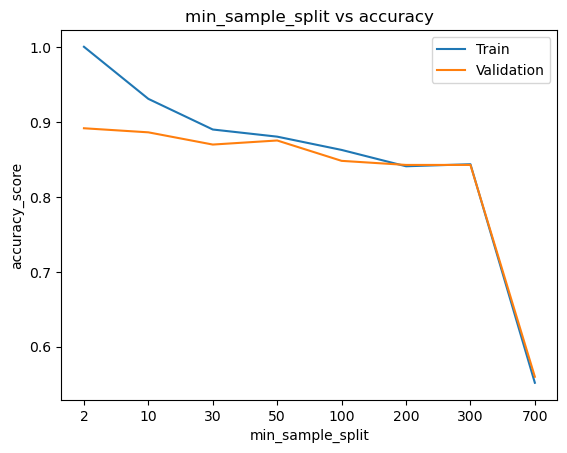

In [ ]:
# Choosing optimum 'min_samples_split' for the random forest . 
accuracy_score_train_list = []
accuracy_scrore_val_list = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_score_train = accuracy_score(y_train, y_pred_train)
    accuracy_scrore_val = accuracy_score(y_val, y_pred_val)
    accuracy_score_train_list.append(accuracy_score_train)
    accuracy_scrore_val_list.append(accuracy_scrore_val)

plt.title('min_sample_split vs accuracy')
plt.xlabel('min_sample_split')
plt.ylabel('accuracy_score')
plt.xticks(ticks = range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_score_train_list)
plt.plot(accuracy_scrore_val_list)
plt.legend(['Train', 'Validation'])

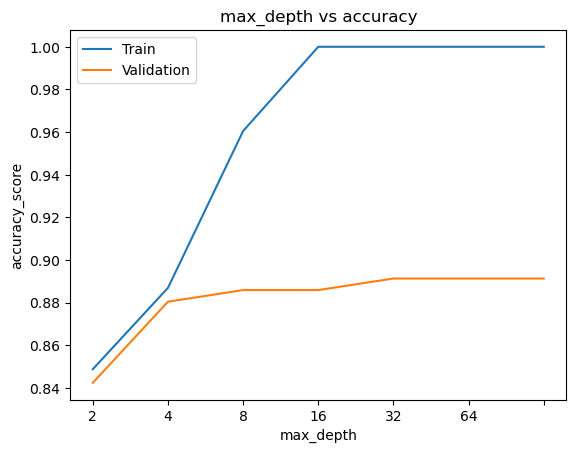

In [ ]:
# Choosing optimum 'max_depth' for the random forest . 
accuracy_score_train_list = []
accuracy_scrore_val_list = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_score_train = accuracy_score(y_train, y_pred_train)
    accuracy_scrore_val = accuracy_score(y_val, y_pred_val)
    accuracy_score_train_list.append(accuracy_score_train)
    accuracy_scrore_val_list.append(accuracy_scrore_val)

plt.title('max_depth vs accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.xticks(ticks = range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_score_train_list)
plt.plot(accuracy_scrore_val_list)
plt.legend(['Train', 'Validation'])

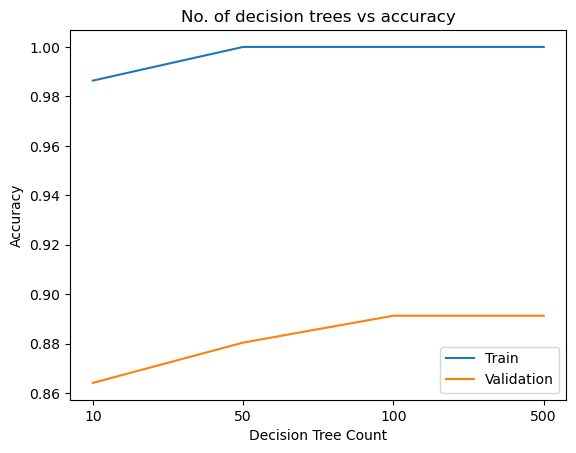

In [35]:
# Choosing optimum 'n_estimators' aka no. of randomly selected decision trees in the random forest . 
accuracy_score_train_list = []
accuracy_scrore_val_list = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_score_train = accuracy_score(y_train, y_pred_train)
    accuracy_scrore_val = accuracy_score(y_val, y_pred_val)
    accuracy_score_train_list.append(accuracy_score_train)
    accuracy_scrore_val_list.append(accuracy_scrore_val)

plt.title('No. of decision trees vs accuracy')
plt.xlabel('Decision Tree Count')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(n_estimators_list)), labels=n_estimators_list)
plt.plot(accuracy_score_train_list)
plt.plot(accuracy_scrore_val_list)
plt.legend(['Train', 'Validation'])

Based on above three hyperparameter tuning and model evaulation, we will use these hyperparameters 

- min_sample_split = 10 
- max_depth = 16
- n_estimators = 100

In [36]:
# Lets see how the model with these hyper parameters perform 
decision_tree_model = RandomForestClassifier(min_samples_split=10, max_depth=16, n_estimators=100, random_state=RANDOM_STATE)
decision_tree_model.fit(X_train, y_train)
y_pred_train = decision_tree_model.predict(X_train)
y_pred_val = decision_tree_model.predict(X_val)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
accuracy_score_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy of model on Training dataset = {accuracy_score_train}")
print(f"Accuracy of model on Validation dataset = {accuracy_score_val}")

Accuracy of model on Training dataset = 0.9305177111716622
Accuracy of model on Validation dataset = 0.8913043478260869


### XGBoost

Next is the Gradient Boosting model, called XGBoost. The boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fit one after the other in order to minimize the error.

The model has the same parameters as a decision tree, plus the learning rate.

- The learning rate is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.
One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form (X_val,y_val).

- On each iteration, it measures the cost (or evaluation metric) on the evaluation datasets.
- Once the cost (or metric) stops decreasing for a number of rounds (called early_stopping_rounds), the training will stop.
- More iterations lead to more estimators, and more estimators can result in overfitting.
- By stopping once the validation metric no longer improves, we can limit the number of estimators created, and reduce overfitting.

First, let's define a subset of our training set (we should not use the test set here).

In [46]:
n = int(len(X_train) * 0.8)

# Part of training dataset used for fitting
X_train_fit = X_train[:n]
y_train_fit = y_train[:n]

# Part of training dataset used for evaluation
X_train_eval = X_train[n:]
y_train_eval = y_train[n:]

In [60]:
import xgboost as xgb

#xgb_model_base = xgb.XGBModel()

xgb_model = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.early_stopping_rounds = 10
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])


[0]	validation_0-logloss:0.63302
[1]	validation_0-logloss:0.59554
[2]	validation_0-logloss:0.56614
[3]	validation_0-logloss:0.54187
[4]	validation_0-logloss:0.52349
[5]	validation_0-logloss:0.50611
[6]	validation_0-logloss:0.49373
[7]	validation_0-logloss:0.48366
[8]	validation_0-logloss:0.47323
[9]	validation_0-logloss:0.46538
[10]	validation_0-logloss:0.46000
[11]	validation_0-logloss:0.45621
[12]	validation_0-logloss:0.45483
[13]	validation_0-logloss:0.44975
[14]	validation_0-logloss:0.44495
[15]	validation_0-logloss:0.44073
[16]	validation_0-logloss:0.44078
[17]	validation_0-logloss:0.43936
[18]	validation_0-logloss:0.44206
[19]	validation_0-logloss:0.44536
[20]	validation_0-logloss:0.44322
[21]	validation_0-logloss:0.44310
[22]	validation_0-logloss:0.44419
[23]	validation_0-logloss:0.44797
[24]	validation_0-logloss:0.44843
[25]	validation_0-logloss:0.45337
[26]	validation_0-logloss:0.45206
[27]	validation_0-logloss:0.45435


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

Even though we initialized the model to allow up to 500 estimators, the algorithm only fit 26 estimators (over 26 rounds of training).

To see why, let's look for the round of training that had the best performance (lowest evaluation metric). You can either view the validation log loss metrics that were output above, or view the model's .best_iteration attribute:

In [66]:
print(f"Best iteration : {xgb_model.best_iteration}")

Best iteration : 17


In [67]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9319
Metrics test:
	Accuracy score: 0.8533
